# Информационный поиск

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://nlp.stanford.edu/~manning/xyzzy/Intro_Inform_Retrieval_Russian.pdf
* https://en.wikipedia.org/wiki/Jaccard_index
* https://en.wikipedia.org/wiki/TF-IDF
* https://en.wikipedia.org/wiki/Okapi_BM25

## Задачи для совместного разбора

1\. Дан корпус текстов. Построить прямой и обратный индексы для слов из текста

In [ ]:
corpus = [
    "Первым специальным индексом для запросов с джокером общего вида является перестановочный индекс",
    "Методы усовершенствования индексов для расширения функциональных возможностей и повышения скорости поиска"
]

In [ ]:
!pip install pymorphy2

In [ ]:
from nltk import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

In [ ]:
index = {}
for idx, doc in enumerate(corpus):
  index[idx] = [
    morph.parse(w)[0].normal_form
    for w in word_tokenize(doc)
  ]

In [ ]:
index

In [ ]:
from collections import defaultdict
# inv_index = defaultdict(list)
inv_index = defaultdict(set)

# defaultdict(f)
# if k not in d:
# d[k] = f() # list()

for idx, tokens in index.items():
  for tok in tokens:
    inv_index[tok].add(idx)

2\. Посчитать индекс Жаккара для предложений из заданного корпуса.

In [ ]:
index[0]

['первый',
 'специальный',
 'индекс',
 'для',
 'запрос',
 'с',
 'джокер',
 'общий',
 'вид',
 'являться',
 'перестановочный',
 'индекс']

In [ ]:
index[1]

['метод',
 'усовершенствование',
 'индекс',
 'для',
 'расширение',
 'функциональный',
 'возможность',
 'и',
 'повышение',
 'скорость',
 'поиск']

In [ ]:
(
    len(set(index[0]).intersection(set(index[1]))),
    len(set(index[0]).union(set(index[1])))
)

(2, 20)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Считайте тексты новостей из файла `news.json`. Назовём прямым индексом словарь, где ключами являются номера новостей, а значениями - списки нормализованных слов, входящих в эту новость. Номер новости определяется ее положением в файле. Назовём обратным индексом словарь, где ключами являются нормальные формы слов, а значениями - множества номеров новостей, которые содержат данное слово (не обязательно в нормальной форме). Постройте прямой и обратный индекс. Выведите из длины на экран. Выведите значения обратного индекса по ключу "москва".

- [ ] Проверено на семинаре

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=a688a2baa0070a56e8dc184ee25a4008cd3216309546555902470a3f73970cf8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [70]:
from nltk import word_tokenize
import pandas as pd
import json
import pymorphy2
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import  word_tokenize
from collections import defaultdict

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
with open('news.json') as fp:
  file = json.load(fp)

In [134]:
# каждая новость - это одно предложение
pd.read_json('news.json')[0].apply(lambda x: '.' in x).any() +\
        pd.read_json('news.json')[0].apply(lambda x: ',' in x).any() +\
        pd.read_json('news.json')[0].apply(lambda x: '?' in x).any() +\
        pd.read_json('news.json')[0].apply(lambda x: '!' in x).any()

False

In [135]:
morph = pymorphy2.MorphAnalyzer()
#tokenizer = RegexpTokenizer("\w+")
tokenizer = RegexpTokenizer("[а-яёА-ЯЁa-zA-Z]+")

In [136]:
index_forward = {}
for idx, doc in enumerate(file):
  index_forward[idx] = [
    morph.parse(w)[0].normal_form
    for w in tokenizer.tokenize(doc.lower())
  ]

In [137]:
file[1]

'банк россии решил снизить ключевую ставку с 20  до 17 '

In [138]:
index_forward[1]

['банк', 'россия', 'решить', 'снизить', 'ключевой', 'ставка', 'с', 'до']

In [139]:
# index_backward = {}

# for idx, words in index_forward.items():
#   for word in words:
#     if word not in index_backward:
#       index_backward[word] = []
#     index_backward[word].append(idx)

In [140]:
index_backward = defaultdict(set)

for idx, tokens in index_forward.items():
  for tok in tokens:
    index_backward[tok].add(idx)

In [141]:
index_backward['банк']

{1, 348, 447}

In [142]:
print(file[1])
print(file[348])
print(file[447])

банк россии решил снизить ключевую ставку с 20  до 17 
«тинькофф банк» заблокировал доступ к пожертвованиям  собранным на выплату штрафов за пикеты — журналист илья азар
банк россии выступил против идеи страховать нефть


In [143]:
len(index_forward), len(index_backward)

(500, 2375)

<p class="task" id="2"></p>

2\. Для каждого документа из текста определите, как часто слова этого документа встречаются в заданном тексте, воспользовавшись обратным индексом. Выведите на экран текст топ-3 новостей, наиболее похожих по набору токенов на заданный текст. Выведите на экран текст найденных новостей и количество совпадающих токенов.

- [ ] Проверено на семинаре

In [144]:
example = "Жириновский предложил перенести столицу из Москвы"

In [145]:
words_example = [morph.parse(w)[0].normal_form for w in tokenizer.tokenize(example)]
words_example

['жириновский', 'предложить', 'перенести', 'столица', 'из', 'москва']

In [146]:
d2 = {}
for word in words_example:
  docs = index_backward[word]
  for idx in docs:
    d2[idx] = d2.get(idx,0)+1

In [147]:
similar_texts = sorted(d2.items(),key=lambda x: x[1], reverse=True)
for i in similar_texts[:3]:
  print('text:', file[i[0]])
  print('number of repeating tokens:', i[1])
  print()


text: трамп предложил перенести новые санкции против россии из за дня народного единства 
number of repeating tokens: 3

text: жириновский предложил дать ремня создателям гачимучи каверов на известные песни 
number of repeating tokens: 2

text: 31 декабря владимир жириновский предложит имя своего преемника 
number of repeating tokens: 2



<p class="task" id="3"></p>

3\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись коэффициентом Жаккара. Для определения количества общих слов в тексте используйте обратный индекс.  Выведите на экран текст найденных новостей и значение коэффициента Жаккара для каждой новости.

- [ ] Проверено на семинаре

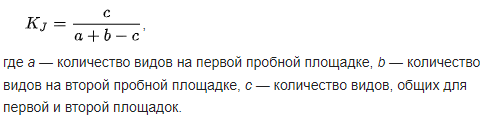

Из прошлого номера возбмем словарь d2, созданный через обратный индекс.

Если индекс документа есть в d2, значит $c = doc \cap example = d2[idx]$, если нет, то $c = 0$

In [148]:
example = "Жириновский предложил перенести столицу из Москвы"

In [149]:
words_example = [morph.parse(w)[0].normal_form for w in tokenizer.tokenize(example)]
a = len(set(words_example))

d3 = {}
for word in words_example:
  docs = index_backward[word]
  for idx in docs:
    d3[idx] = d3.get(idx,0)+1

In [150]:
K_J = {}
for idx, txt in index_forward.items():
  if idx in d3:
    c = d3[idx]
    b = len(set(txt))
    K_J[idx] = c / (a+b-c)
  else:
    K_J[idx] = 0

In [151]:
similar_texts3 = sorted(K_J.items(), key=lambda x: x[1], reverse=True)
for i in similar_texts3[:3]:
  print('text:', file[i[0]])
  print('K_J:', i[1])
  print()


text: трамп предложил перенести новые санкции против россии из за дня народного единства 
K_J: 0.2

text: международную универсиаду 2023 года перенесут из екатеринбурга
K_J: 0.2

text: 31 декабря владимир жириновский предложит имя своего преемника 
K_J: 0.18181818181818182



<p class="task" id="4"></p>

4\. Реализуйте функцию для расчета TF-IDF.
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

Для расчета обратной частоты документа воспользуйтесь обратным индексом из предыдущей задачи. При расчете IDF добавьте сглаживание, прибавив единицу к числителю и знаменателю дроби.

- [ ] Проверено на семинаре

In [161]:
import numpy as np

In [164]:
idf = {}
N = len(file)

for word, docs_id in index_backward.items():
  idf[word] = np.log((N+1) / (len(docs_id)+1))

In [167]:
tf_idf = {}
for idx, doc in index_forward.items():
  tf_idf[idx] = {}
  for word in doc:
    tf_idf[idx][word] = doc.count(word) / len(doc) * idf[word]

<p class="task" id="5"></p>

5\. Используя собственную реализацию TD-IDF, закодируйте новости. Результатом должна являться матрица `MxN`, где `M` - количество новостей в корпусе, `N` - размер обратного индекса. Выведите форму полученной матрицы на экран.

- [ ] Проверено на семинаре

In [191]:
df5 = pd.DataFrame(tf_idf).T.fillna(0)
df5.iloc[:10,:10]

,российский,бюджет,в,март,недополучить,более,миллиард,рубль,нефтегазовый,доход
0,0.269025,0.511799,0.084133,0.552346,0.552346,0.42707,0.42707,0.381871,0.552346,0.552346
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.129435,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.120190,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.200985,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


In [192]:
df5.shape

(500, 2375)

In [193]:
df5.shape == (len(file), len(index_backward))

True

<p class="task" id="6"></p>

6\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись матрицей TD-IDF из предыдущего задания. Для определения схожести используйте функцию косинусного расстояния. Выведите на экран текст найденных новостей и значение метрики близости для каждой новости.

- [ ] Проверено на семинаре

In [180]:
example = "Жириновский предложил перенести столицу из Москвы"
words_example = [morph.parse(w)[0].normal_form for w in tokenizer.tokenize(example)]
words_example

['жириновский', 'предложить', 'перенести', 'столица', 'из', 'москва']

In [229]:
words = list(df5.columns)
vec_ex = {}

for word in words:
  if word in words_example:
    vec_ex[word] = words_example.count(word) / len(doc) * idf[word]
  else:
    vec_ex[word] = 0

vec_ex = np.array(list(vec_ex.values()))

In [230]:
df5.values.shape

(500, 2375)

In [233]:
vec_ex.shape

(2375,)

In [264]:
dist = 1-df5.values@vec_ex / (np.linalg.norm(df5.values, axis=1)*np.linalg.norm(vec_ex))
sim_idx = dist.argsort()
dist[sim_idx[:10]]

array([0.70863768, 0.72998482, 0.7492542 , 0.77085303, 0.78384458,
       0.78580243, 0.80412392, 0.87301437, 0.8997564 , 0.90195995])

In [268]:
sim_idx[:3]

array([ 9, 78, 36])

In [267]:
for i in sim_idx[:3]:
  print('text:', file[i])
  print()


text: трамп предложил перенести новые санкции против россии из за дня народного единства 

text: 31 декабря владимир жириновский предложит имя своего преемника 

text: международную универсиаду 2023 года перенесут из екатеринбурга



<p class="task" id="7"></p>

7\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись собственной реализацией функции ранжирования [BM25](https://en.wikipedia.org/wiki/Okapi_BM25). Выведите на экран текст найденных новостей и значение метрики ранжирования для каждой новости.

- [ ] Проверено на семинаре

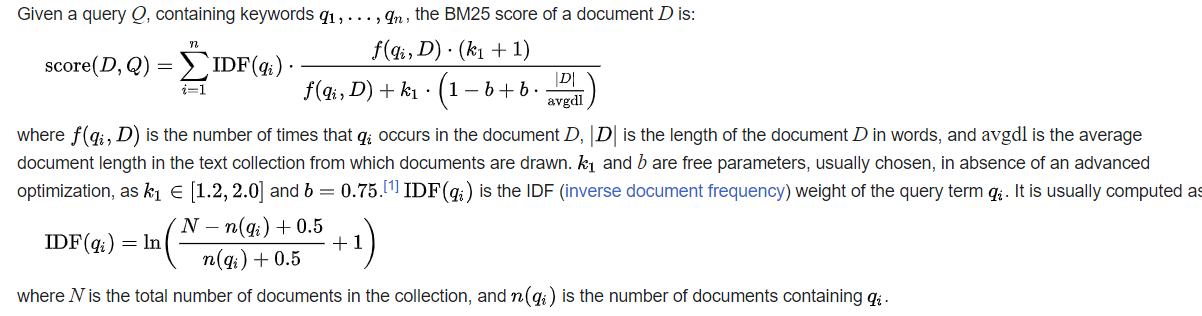

In [269]:
example = "Жириновский предложил перенести столицу из Москвы"
words_example = [morph.parse(w)[0].normal_form for w in tokenizer.tokenize(example)]
words_example

['жириновский', 'предложить', 'перенести', 'столица', 'из', 'москва']

In [271]:
lenghts = [len(index_forward[doc]) for doc in index_forward]
D = sum(lenghts)
advdl = D / len(file)


idf7 = {}
for word in words_example:
  idf7[word] = np.log((len(file)-len(index_backward[word])+0.5)/(len(index_backward[word])+0.5) + 1)

k1 = 1.2
b = 0.75
d7 = {}
for idx, doc in index_forward.items():
  score = 0
  for word in words_example:
    f_q = doc.count(word)
    score += idf7[word] * f_q*(k1+1) / (f_q + k1*(1-b + b*(D/advdl)))

  d7[idx] = score

In [273]:
similar_texts7 = sorted(d7.items(), key=lambda x: x[1], reverse=True)
for i in similar_texts7[:3]:
  print('text:', file[i[0]])
  print('BM25 score:', i[1])
  print()

text: трамп предложил перенести новые санкции против россии из за дня народного единства 
BM25 score: 0.04985151756280831

text: 31 декабря владимир жириновский предложит имя своего преемника 
BM25 score: 0.03954635908883146

text: жириновский предложил дать ремня создателям гачимучи каверов на известные песни 
BM25 score: 0.03954635908883146



## Обратная связь
- [ ] Хочу получить обратную связь по решению